In [1]:
import pandas as pd

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
dados = pd.read_csv('microdados_vacinacao.csv')

In [3]:
dados.head(5)


,paciente_codigo_grupo,vacina,vacina_lote,estabelecimento_razao_social,estabelecimento,paciente_cep,estabelecimento_unidade_federativa,sistema_origem,paciente_municipio,paciente_etnia,...,data_aplicacao,documento_uuid,paciente_sexo_biologico,estabelecimento_codigo_cnes,paciente_unidade_federativa,paciente_codigo_pais,paciente_pais,paciente_codigo_ibge_municipio,paciente_subgrupo,paciente_codigo_etnia
0,9.0,Covid-19-Coronavac-Sinovac/Butantan,202009011,PM DE MORRO DO CHAPEU DO PIAUI,UNIDADE BASICA DE SAUDE PATRIOTINO LAGES REBELO,64180.0,PI,ESUS APS - NACIONAL (OFFLINE),Esperantina,Amarela,...,2021-02-16,f9a282c2-d608-50e3-8cd6-614b94579138,F,2649462,PI,10.0,Brasil,2203701.0,Enfermeiro(a),4.0
1,9.0,Covid-19-Coronavac-Sinovac/Butantan,210009,SANTA CASA DE MISERICORDIA DE GUARAREMA,SANTA CASA DE GUARAREMA,12010.0,SP,VACIVIDA,Taubaté,Branca,...,2021-02-06,0b20fb92-d744-563c-ba0e-fa4a8839fbef,F,2773333,SP,10.0,Brasil,3554102.0,Outros,1.0
2,9.0,Covid-19-Coronavac-Sinovac/Butantan,202010041,SECRETARIA DE SAUDE,HOSPITAL BARAO DE LUCENA,50751.0,PE,Novo PNI,Recife,Amarela,...,2021-02-12,df60db8c-841a-572d-873b-3f45ea50306a,M,2427427,PE,10.0,Brasil,2611606.0,Auxiliar de Enfermagem,4.0
3,9.0,Covid-19-Coronavac-Sinovac/Butantan,210009,MUNICIPIO DE SAO VICENTE,ESF RIO BRANCO II E III SAO VICENTE,11349.0,SP,VACIVIDA,São Vicente,NaN,...,2021-02-08,f72b6488-50ba-5fb6-ad53-52c4563f4442,F,2033275,SP,10.0,Brasil,3551009.0,Outros,99.0
4,9.0,Vacina Covid-19 - Covishield,4120Z005,MUNICIPIO DE JOAO PESSOA,REDE FRIO CENTRAL MUNICIPAL DE IMUNOBIOLOGICOS,58020.0,PB,Novo PNI,João Pessoa,Amarela,...,2021-02-02,597a9698-ba66-5e11-a1b8-bbe72dabbb33,M,287660,PB,10.0,Brasil,2507507.0,Técnico de Enfermagem,4.0


In [5]:
dados['paciente_idade']

0          39.0
1          35.0
2          55.0
3          31.0
4          51.0
           ... 
6272486    93.0
6272487    25.0
6272488    62.0
6272489    45.0
6272490    86.0
Name: paciente_idade, Length: 6272491, dtype: float64

In [6]:
dados['paciente_etnia']

0          Amarela
1           Branca
2          Amarela
3              NaN
4          Amarela
            ...   
6272486    Amarela
6272487     Branca
6272488      Parda
6272489    Amarela
6272490     Branca
Name: paciente_etnia, Length: 6272491, dtype: object

In [7]:
dados['paciente_sexo_biologico']

0          F
1          F
2          M
3          F
4          M
          ..
6272486    M
6272487    F
6272488    F
6272489    F
6272490    F
Name: paciente_sexo_biologico, Length: 6272491, dtype: object

In [8]:
dados['paciente_subgrupo']

0                       Enfermeiro(a)
1                              Outros
2              Auxiliar de Enfermagem
3                              Outros
4               Técnico de Enfermagem
                      ...            
6272486    Pessoas de 80 anos ou mais
6272487                        Médico
6272488            Pessoal da Limpeza
6272489            Pessoal da Limpeza
6272490    Pessoas de 80 anos ou mais
Name: paciente_subgrupo, Length: 6272491, dtype: object

In [9]:
dados['paciente_unidade_federativa']

0          PI
1          SP
2          PE
3          SP
4          PB
           ..
6272486    PI
6272487    SC
6272488    AM
6272489    PE
6272490    SP
Name: paciente_unidade_federativa, Length: 6272491, dtype: object

In [14]:
dados['vacina'].value_counts()

vacina
Covid-19-Coronavac-Sinovac/Butantan                          4842847
Vacina Covid-19 - Covishield                                 1429338
Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer        294
Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag                     12
Name: count, dtype: int64

In [54]:
dados['paciente_grupo'].value_counts()

paciente_grupo
Trabalhadores de Saúde                             4195807
Faixa Etária                                       1467236
Povos Indígenas                                     245784
Pessoas de 60 anos ou mais institucionalizadas      195676
Pessoas com Deficiência                              18022
Comorbidades                                         13785
Povos e Comunidades Tradicionais                      9416
Forças de Segurança e Salvamento                      4445
Trabalhadores da Educação                             2172
Forças Armadas (membros ativos)                        391
Pessoas em Situação de Rua                             378
Funcionário do Sistema de Privação de Liberdade        272
População Privada de Liberdade                          76
Trabalhadores Portuários                                67
Trabalhadores Industriais                               41
Name: count, dtype: int64

In [19]:
dados.dtypes

paciente_codigo_grupo                    float64
vacina                                    object
vacina_lote                               object
estabelecimento_razao_social              object
estabelecimento                           object
paciente_cep                             float64
estabelecimento_unidade_federativa        object
sistema_origem                            object
paciente_municipio                        object
paciente_etnia                            object
estabelecimento_municipio                 object
paciente_idade                           float64
paciente_codigo_subgrupo                   int64
numero_dose                              float64
paciente_nacionalidade                    object
codigo_vacina                              int64
estabelecimento_codigo_ibge_municipio      int64
paciente_uuid                             object
paciente_grupo                            object
data_aplicacao                            object
documento_uuid      

In [77]:
pd.crosstab(dados['paciente_etnia'], dados['numero_dose'])



numero_dose,1.0,2.0
paciente_etnia,,
Amarela,578166,127011
Branca,1952956,469785
Indígena,139417,41519
Parda,857221,198511
Preta,189276,44779


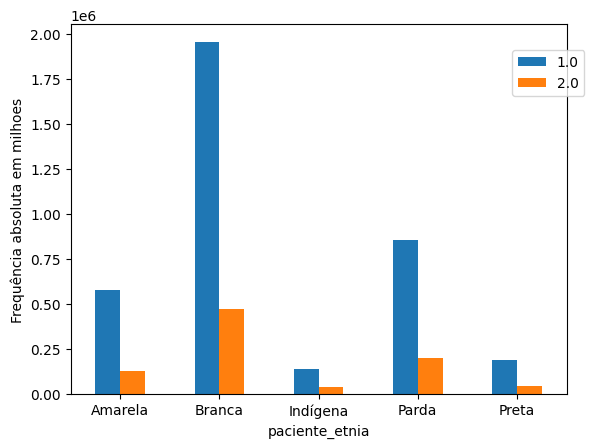

In [66]:
etnia=pd.crosstab(dados['paciente_etnia'], dados['numero_dose'])



etnia.plot.bar()
plt.ylabel('Frequência absoluta em milhoes')
plt.xticks(rotation = 'horizontal')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

Podemos analisar a grande maioria de brancos e pardos recebendo as doses da vacina, muito por conta de serem as etnias mais preponderantes das regiões com mais acesso a vacina e com mais profissionais da saude 


In [74]:
dadossex=dados.loc[dados['paciente_sexo_biologico']!='I']
sexo = pd.crosstab(dadossex['paciente_sexo_biologico'], dadossex['numero_dose'])

In [75]:
pd.crosstab(dadossex['paciente_sexo_biologico'], dadossex['numero_dose'])

numero_dose,1.0,2.0
paciente_sexo_biologico,,
F,3470673,799309
M,1646826,355665


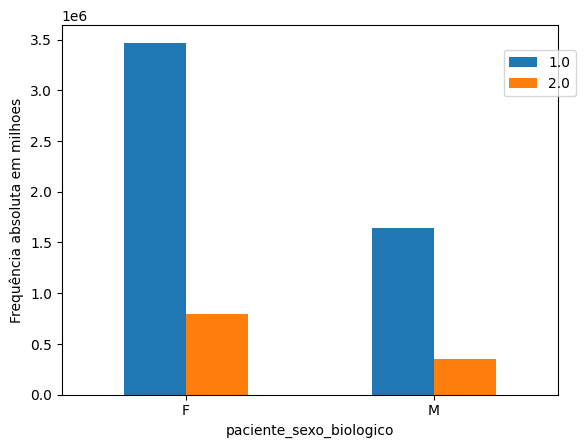

In [76]:


sexo.plot.bar()
plt.ylabel('Frequência absoluta em milhoes')
plt.xticks(rotation = 'horizontal')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

Vemos uma maioria de doses destinadas as mulheres, o que faz sentido visto que as campanhas de vacinação priorizavam gravidas e pessoas da saude (que tem seu maior publico com sexo biologico feminino), alem da maior de existencia de mulheres idosas do que homens idosos

In [ ]:
pd.crosstab(dados['paciente_unidade_federativa'], dados['numero_dose'])

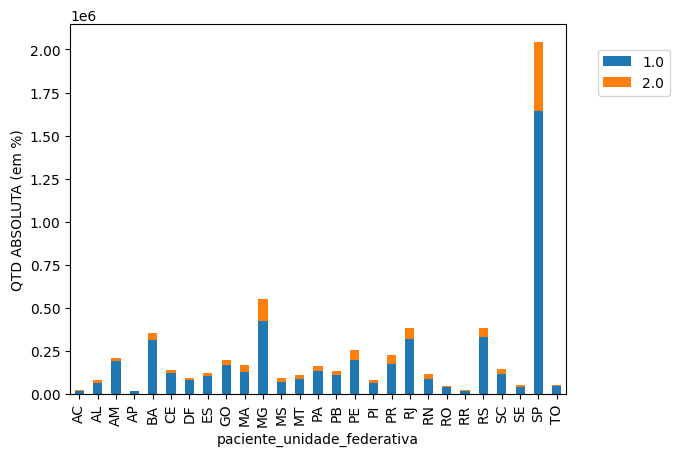

In [72]:
estado=pd.crosstab(dados['paciente_unidade_federativa'], dados['numero_dose'])

estado.plot.bar(stacked=True)
plt.ylabel("QTD ABSOLUTA (em %)")
plt.xticks(rotation = 90)
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

Aqui vemos a importancia de cada estado na introdução na vacina no Brasil, estados com mais laboratorios e capacidade logistica e opulacional tinham o maior numero de doses

In [78]:
pd.crosstab(dados['paciente_grupo'],dados['numero_dose'])

numero_dose,1.0,2.0
paciente_grupo,,
Comorbidades,11437,2348
Faixa Etária,1446530,20705
Forças Armadas (membros ativos),345,46
Forças de Segurança e Salvamento,3824,621
Funcionário do Sistema de Privação de Liberdade,223,49
Pessoas com Deficiência,14462,3560
Pessoas de 60 anos ou mais institucionalizadas,133630,62046
Pessoas em Situação de Rua,234,144
População Privada de Liberdade,64,12


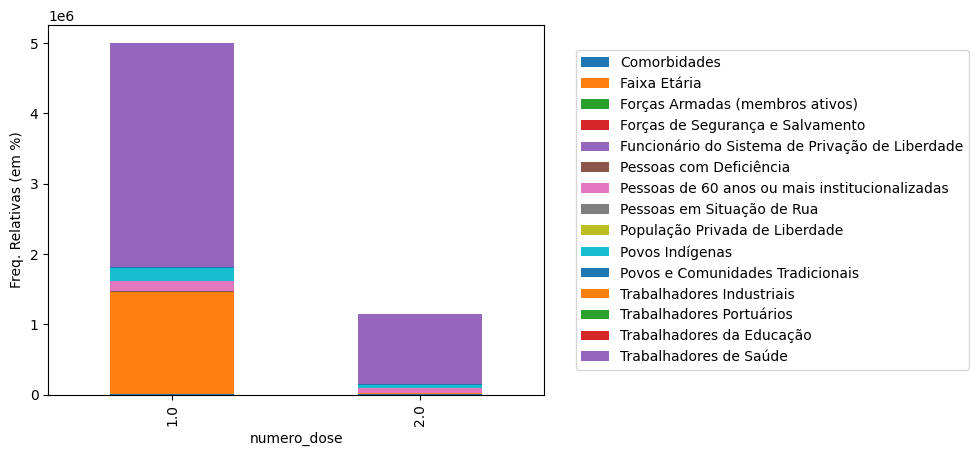

In [70]:
grupo=pd.crosstab(dados['numero_dose'],dados['paciente_grupo'])

grupo.plot.bar(stacked=True)
plt.ylabel("Freq. Relativas (em %)")
plt.xticks(rotation = 90)
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

Por serem muitos grupo, a representação grafica nao ficou tao legal, por isso peço que siga o crosstab e os dados numericos para perceber o foco o publico dos atuantes na area da saude e nos idosos


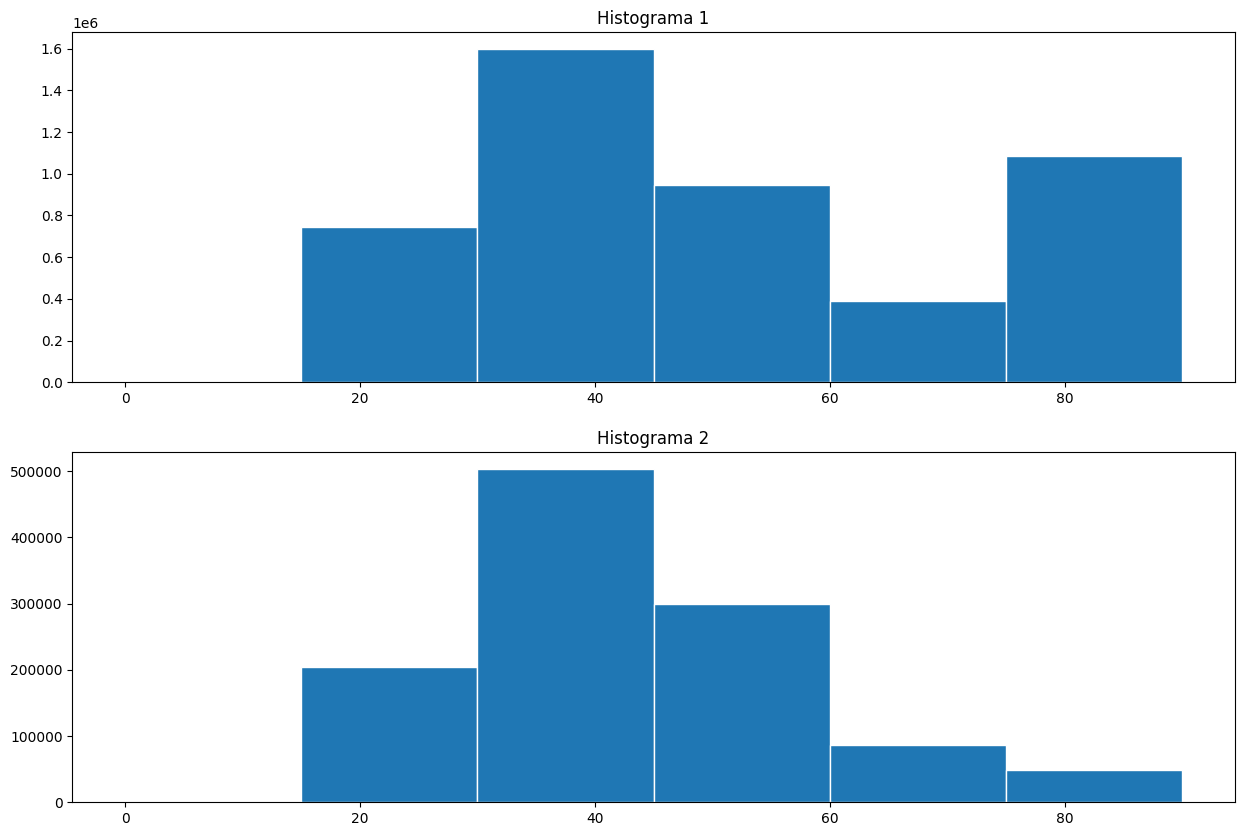

In [59]:
primeira_dose=dados.loc[dados['numero_dose']==1.0]
segunda_dose=dados.loc[dados['numero_dose']==2.0]

plt.figure(figsize=(15, 10))

plt.subplot(211) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 1
plt.hist(primeira_dose['paciente_idade'], bins=[0,15,30,45,60,75,90],edgecolor='white')
plt.title("Histograma 1")

plt.subplot(212) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 1
plt.hist(segunda_dose['paciente_idade'],bins=[0,15,30,45,60,75,90], edgecolor='white')
plt.title("Histograma 2")

plt.show()

Aqui vemos duas altas, no publico de media de 35 anos, que esta reacionado aos profissionais da area media e outro pico na população mais idosa, para cima dos 80 anos